In [2]:
# NumPy for numerical analysis
import numpy as np

# Pandas for data analysis
import pandas as pd

# Matplotlib.pyplot, Seaborn, and Plotly.express for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sqlite3 for database management
import sqlite3

In [3]:
#Load the data
# Function is created to load the data
def load_data(path, data_format):
    
    # if statement used to differentiate data format. Checks if data is in 'csv' format
    if data_format.lower() == 'csv':
        data = pd.read_csv(path, compression='gzip') # 'compression' parameter used since the file is compressed
    # elif statement used to check if data is in 'db' format
    elif data_format.lower() == 'db':
        conn = sqlite3.connect(path) # returns a Connection object that we will use to interact with the database
        return conn
    # else statement returns an error if the data format is not recognized
    else:
        raise ValueError('Data format not recognized')
    
    return data # returns the DataFrame under the variable name 'data'

### Dataset 1: Movie Budgets

In [4]:
# Load the movie budgets as a pandas DataFrame and assign it to the variable 'movie_budgets_df'
movie_budgets_df = load_data('zippedData/tn.movie_budgets.csv.gz', 'csv')

# Preview the first few rows of the 'movie_budgets_df' DataFrame
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
# General description of the 'movie_budgets_df' data
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB



### Dataset2 IMDB

In [6]:
# Load the imdb data into a DataFrame which returns a Connection object
conn = load_data('/home/james/.cache/.fr-xfuRnN/im.db', 'db')

# View the tables within the idmb database as a DataFrame
imdb_tables = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
imdb_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [7]:
# Preview the tables of interest in the IMDB data
movie_basics_df = pd.read_sql("""
                      SELECT * 
                        FROM  movie_basics AS mb """, conn)

movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
# Preview the tables of interest in the IMDB data
persons_df = pd.read_sql("""
                      SELECT * 
                        FROM  persons
                      ;
                      """, conn)

persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [10]:
persons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [11]:
# Preview the tables of interest in the IMDB data
movie_ratings_df = pd.read_sql("""
                      SELECT * 
                        FROM  movie_ratings
                      ;
                      """, conn)

movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [12]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [13]:
movie_akas_df = pd.read_sql("""
                      SELECT * 
                        FROM  movie_akas
                      ;
                      """, conn)

movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [14]:
movie_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [15]:
#Read directors table
directors_df = pd.read_sql("""
                      SELECT DISTINCT * 
                        FROM  directors
                      ;
                      """, conn)

In [16]:
#Read writers table
writers_df = pd.read_sql("""
SELECT * 
FROM writers
;
""", conn)

In [17]:
# Close the connection to the IMDB database
conn.close()

## Data Preparation

We must first identify and clean the pertinent data that will be utilized to compute the RoI based on the performance criteria we are using to identify the best-performing movies at the box office. Also, the business issue is attempting to identify the categories of movies that are now doing the best business; hence, we will focus our investigation on movies that have been published during the last ten years.

In [18]:
# Limit the analysis to films that have been released within the past 10 years
movie_budgets_df = movie_budgets_df[movie_budgets_df['release_date'].apply(lambda x: int(x.split(" ")[-1]) >= 2012)]

movie_budgets_df # Preview the updated 'movie_budgets_df' DataFrame

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,$0
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584"
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0


In [19]:
# Define a function to convert the production_budget, domestic_gross, and worldwide_gross columns to numeric values
def convert_to_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(",", "").str.replace("$", ""))
    
    return df

convert_to_numeric(movie_budgets_df, 'production_budget') # convert the production_budget column to numeric values
convert_to_numeric(movie_budgets_df, 'domestic_gross') # convert the domestic_gross column to numeric values
convert_to_numeric(movie_budgets_df, 'worldwide_gross') # convert the worldwide_gross column to numeric values

movie_budgets_df # Preview the updated 'movie_budgets_df' DataFrame

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0
5771,72,"May 19, 2015",Family Motocross,10000,0,0
5772,73,"Jan 13, 2012",Newlyweds,9000,4584,4584
5777,78,"Dec 31, 2018",Red 11,7000,0,0


In [20]:
# Find the Top 200 films with the worldwide gross
movie_budgets_df = movie_budgets_df.sort_values(by='worldwide_gross', ascending=False)[:200]
movie_budgets_df # Preview the updated 'movie_budgets_df' DataFrame

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897
...,...,...,...,...,...,...
327,28,"Dec 21, 2016",Passengers,110000000,100014699,302239672
124,25,"May 31, 2019",Godzilla: King of the Monsters,170000000,85576941,299276941
698,99,"Jun 8, 2018",Oceanâs 8,70000000,140218711,297115976
329,30,"Sep 30, 2016",Miss Peregrineâs Home for Peculiar Children,110000000,87242834,295986876


In [21]:
#Create a new column called 'RoI' that calculates the return on investment (RoI) for each film
# The formula for calculating RoI is to divide the film’s box office earnings by the production budget and multiplying the result by 100
movie_budgets_df['RoI'] = movie_budgets_df['worldwide_gross'] / movie_budgets_df['production_budget'] * 100

movie_budgets_df # Preview the updated 'movie_budgets_df' DataFrame

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,RoI
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,671.016739
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,682.711400
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,766.909239
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,799.327786
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,674.638176
...,...,...,...,...,...,...,...
327,28,"Dec 21, 2016",Passengers,110000000,100014699,302239672,274.763338
124,25,"May 31, 2019",Godzilla: King of the Monsters,170000000,85576941,299276941,176.045259
698,99,"Jun 8, 2018",Oceanâs 8,70000000,140218711,297115976,424.451394
329,30,"Sep 30, 2016",Miss Peregrineâs Home for Peculiar Children,110000000,87242834,295986876,269.078978


In [22]:
# Sort the DataFrame according to the 'RoI' column
movie_budgets_df = movie_budgets_df.sort_values(by='RoI', ascending=False)

movie_budgets_df # Preview the updated 'movie_budgets_df' DataFrame

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,RoI
3517,18,"May 25, 2012",Les Intouchables,10800000,13182281,484873045,4489.565231
3342,43,"Jun 6, 2014",The Fault in Our Stars,12000000,124872350,307166834,2559.723617
2491,92,"Dec 9, 2016",La La Land,20000000,151101803,426351163,2131.755815
3001,2,"Aug 11, 2017",Annabelle: Creation,15000000,102092201,305384865,2035.899100
1623,24,"Sep 8, 2017",It,35000000,327481748,697457969,1992.737054
...,...,...,...,...,...,...,...
78,79,"Jul 22, 2016",Star Trek Beyond,185000000,158848340,335802233,181.514721
72,73,"Nov 25, 2015",The Good Dinosaur,187500000,123087120,333771037,178.011220
124,25,"May 31, 2019",Godzilla: King of the Monsters,170000000,85576941,299276941,176.045259
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,142.964126


For this stage of data preparation, we shall be looking to integrate the key features of the top performing films into one dataset if possible. These features include Genre, Runtime (Length), Director(s) & Writer(s), Cast, Gross Revenue, Rating, and Production Budget.

In [23]:
# Identify a unique column within the 'movie_budgets_df' DataFrame that can be used to integrate data from other sources.
print(f"The release_date column has {len(movie_budgets_df.release_date.unique())} unique values") # identify number the unique release_date values
print(f"The movie column has {len(movie_budgets_df.movie.unique())} unique values") # identify number of unique movie names

The release_date column has 178 unique values
The movie column has 200 unique values


In [24]:
# We shall be using either the original_title/primary_title column to join the two DataFrames

# Try joining the 'movie_budgets_df' and 'movie_titles_df' DataFrames on the 'original_title' column first
option_1 = movie_budgets_df.join(movie_basics_df.set_index('original_title'), on='movie', how='inner')
print(option_1.info())

# Try joining the 'movie_budgets_df' and 'movie_titles_df' DataFrames on the 'primary_title' column
option_2 = movie_budgets_df.join(movie_basics_df.set_index('primary_title'), on='movie', how='inner')
print(option_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 3342 to 31
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 222 non-null    int64  
 1   release_date       222 non-null    object 
 2   movie              222 non-null    object 
 3   production_budget  222 non-null    int64  
 4   domestic_gross     222 non-null    int64  
 5   worldwide_gross    222 non-null    int64  
 6   RoI                222 non-null    float64
 7   movie_id           222 non-null    object 
 8   primary_title      222 non-null    object 
 9   start_year         222 non-null    int64  
 10  runtime_minutes    211 non-null    float64
 11  genres             219 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 22.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 3342 to 31
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 

As there appears to be a one-to-many link between both selections, more than 200 films have been returned in the combined DataFrame. This makes sense because movies have been known to share names. The first step in resolving this issue is to remove all movies from the'movie basics df' DataFrame that are older than ten years. As a result, there will be fewer instances of a movie with the same name as another movie.

In [25]:
# Drop the films in the 'movie_basics_df' that are older than 10 years
movie_basics_df = movie_basics_df[movie_basics_df['start_year'] >= 2012]

movie_basics_df # Preview the updated 'movie_basics_df' DataFrame

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


We now assess if our one-to-many relationships have decreased as a result.

In [26]:
option_1 = movie_budgets_df.join(movie_basics_df.set_index('original_title'), on='movie', how='inner')
print(option_1.info())

option_2 = movie_budgets_df.join(movie_basics_df.set_index('primary_title'), on='movie', how='inner')
print(option_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 3342 to 31
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 213 non-null    int64  
 1   release_date       213 non-null    object 
 2   movie              213 non-null    object 
 3   production_budget  213 non-null    int64  
 4   domestic_gross     213 non-null    int64  
 5   worldwide_gross    213 non-null    int64  
 6   RoI                213 non-null    float64
 7   movie_id           213 non-null    object 
 8   primary_title      213 non-null    object 
 9   start_year         213 non-null    int64  
 10  runtime_minutes    204 non-null    float64
 11  genres             211 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 21.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 3342 to 31
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 

We can observe that the one-to-many linkages have somewhat decreased as a result. There is still some cleaning to be done, though. We'll try to connect using the "original title" column based on the two join choices. The work of reducing the data to the Top 200 movies will be made easier by the missing values in the 'runtime minutes' column and the reduced number of duplicate records.

In [27]:
# Join the 'movie_budgets_df' and 'movie_titles_df' DataFrames on the 'original_title' column and assign the resulting DataFrame to 'top_movies_df'
top_movies_df = movie_budgets_df.join(movie_basics_df.set_index('original_title'), on='movie', how='inner')

top_movies_df # Preview the updated 'top_movies_df' DataFrame

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,RoI,movie_id,primary_title,start_year,runtime_minutes,genres
3342,43,"Jun 6, 2014",The Fault in Our Stars,12000000,124872350,307166834,2559.723617,tt2582846,The Fault in Our Stars,2014,126.0,"Drama,Romance"
2491,92,"Dec 9, 2016",La La Land,20000000,151101803,426351163,2131.755815,tt3783958,La La Land,2016,128.0,"Comedy,Drama,Music"
3001,2,"Aug 11, 2017",Annabelle: Creation,15000000,102092201,305384865,2035.899100,tt5140878,Annabelle: Creation,2017,109.0,"Horror,Mystery,Thriller"
1623,24,"Sep 8, 2017",It,35000000,327481748,697457969,1992.737054,tt1396484,It,2017,135.0,"Horror,Thriller"
2865,66,"Apr 6, 2018",A Quiet Place,17000000,188024361,334522294,1967.778200,tt6347308,A Quiet Place,2016,80.0,Documentary
...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,"Jul 22, 2016",Star Trek Beyond,185000000,158848340,335802233,181.514721,tt2660888,Star Trek Beyond,2016,122.0,"Action,Adventure,Sci-Fi"
72,73,"Nov 25, 2015",The Good Dinosaur,187500000,123087120,333771037,178.011220,tt1979388,The Good Dinosaur,2015,93.0,"Adventure,Animation,Comedy"
124,25,"May 31, 2019",Godzilla: King of the Monsters,170000000,85576941,299276941,176.045259,tt3741700,Godzilla: King of the Monsters,2019,132.0,"Action,Adventure,Fantasy"
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,142.964126,tt3778644,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy"


In [28]:
# Drop records that are missing 'runtime_minutes' values
top_movies_df = top_movies_df.dropna(subset=['runtime_minutes'])

top_movies_df # Preview the updated 'top_movies_df' DataFrame

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,RoI,movie_id,primary_title,start_year,runtime_minutes,genres
3342,43,"Jun 6, 2014",The Fault in Our Stars,12000000,124872350,307166834,2559.723617,tt2582846,The Fault in Our Stars,2014,126.0,"Drama,Romance"
2491,92,"Dec 9, 2016",La La Land,20000000,151101803,426351163,2131.755815,tt3783958,La La Land,2016,128.0,"Comedy,Drama,Music"
3001,2,"Aug 11, 2017",Annabelle: Creation,15000000,102092201,305384865,2035.899100,tt5140878,Annabelle: Creation,2017,109.0,"Horror,Mystery,Thriller"
1623,24,"Sep 8, 2017",It,35000000,327481748,697457969,1992.737054,tt1396484,It,2017,135.0,"Horror,Thriller"
2865,66,"Apr 6, 2018",A Quiet Place,17000000,188024361,334522294,1967.778200,tt6347308,A Quiet Place,2016,80.0,Documentary
...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,"Jul 22, 2016",Star Trek Beyond,185000000,158848340,335802233,181.514721,tt2660888,Star Trek Beyond,2016,122.0,"Action,Adventure,Sci-Fi"
72,73,"Nov 25, 2015",The Good Dinosaur,187500000,123087120,333771037,178.011220,tt1979388,The Good Dinosaur,2015,93.0,"Adventure,Animation,Comedy"
124,25,"May 31, 2019",Godzilla: King of the Monsters,170000000,85576941,299276941,176.045259,tt3741700,Godzilla: King of the Monsters,2019,132.0,"Action,Adventure,Fantasy"
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,142.964126,tt3778644,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy"


The DataFrame has been reduced to 204 entries at this point. We will contrast the year value in the "release date" column with the "start year" field in order to eliminate the erroneous duplicate records. Records that return contradictory values will be discarded.

In [29]:
# Create a new column called 'release_year' that extracts the year from the 'release_date' column
top_movies_df['release_year'] = top_movies_df['release_date'].apply(lambda x: int(x.split(" ")[-1]))


#Compare the 'release_year' column to the 'start_year' column. Drop the conflicting records
top_movies_df = top_movies_df.loc[top_movies_df['release_year'] == top_movies_df['start_year']]

top_movies_df # Preview the updated 'top_movies_df' DataFrame

<ipython-input-29-21391e8ecdab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_movies_df['release_year'] = top_movies_df['release_date'].apply(lambda x: int(x.split(" ")[-1]))


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,RoI,movie_id,primary_title,start_year,runtime_minutes,genres,release_year
3342,43,"Jun 6, 2014",The Fault in Our Stars,12000000,124872350,307166834,2559.723617,tt2582846,The Fault in Our Stars,2014,126.0,"Drama,Romance",2014
2491,92,"Dec 9, 2016",La La Land,20000000,151101803,426351163,2131.755815,tt3783958,La La Land,2016,128.0,"Comedy,Drama,Music",2016
3001,2,"Aug 11, 2017",Annabelle: Creation,15000000,102092201,305384865,2035.899100,tt5140878,Annabelle: Creation,2017,109.0,"Horror,Mystery,Thriller",2017
1623,24,"Sep 8, 2017",It,35000000,327481748,697457969,1992.737054,tt1396484,It,2017,135.0,"Horror,Thriller",2017
2865,66,"Apr 6, 2018",A Quiet Place,17000000,188024361,334522294,1967.778200,tt6644200,A Quiet Place,2018,90.0,"Drama,Horror,Sci-Fi",2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,"Jul 22, 2016",Star Trek Beyond,185000000,158848340,335802233,181.514721,tt2660888,Star Trek Beyond,2016,122.0,"Action,Adventure,Sci-Fi",2016
72,73,"Nov 25, 2015",The Good Dinosaur,187500000,123087120,333771037,178.011220,tt1979388,The Good Dinosaur,2015,93.0,"Adventure,Animation,Comedy",2015
124,25,"May 31, 2019",Godzilla: King of the Monsters,170000000,85576941,299276941,176.045259,tt3741700,Godzilla: King of the Monsters,2019,132.0,"Action,Adventure,Fantasy",2019
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,142.964126,tt3778644,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy",2018


In [30]:
len(top_movies_df['movie'].unique()) # Identify the number of movie titles in the 'top_movies_df' DataFrame

170

The DataFrame's size has been drastically decreased. This suggests that we may have deleted any outdated entries. There may be up to 4 duplicate entries that need to be examined now that the DataFrame is reduced to 174 records and there are 170 unique movie titles.

In [31]:
# Identify the titles of the duplicate movie titles
duplicate_movie_titles = top_movies_df[top_movies_df.duplicated(subset='movie')].movie.unique()
print(f"{len(duplicate_movie_titles)} duplicate title(s)") # identify number of duplicate movie titles

# Identify the movie ids of the unique movie titles
duplicate_movie_ids = top_movies_df[top_movies_df.duplicated(subset='movie_id')].movie_id.unique()
print(f"{len(duplicate_movie_ids)} duplicate id(s)") # identify number of duplicate movie ids


3 duplicate title(s)
0 duplicate id(s)


In [32]:
# Examine the records that belong to the specified set of movies
top_movies_df[top_movies_df.movie.isin(duplicate_movie_titles)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,RoI,movie_id,primary_title,start_year,runtime_minutes,genres,release_year
412,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,562.685635,tt1661199,Cinderella,2015,105.0,"Drama,Family,Fantasy",2015
412,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,562.685635,tt5089556,Cinderella,2015,113.0,Fantasy,2015
101,2,"Nov 22, 2017",Coco,175000000,209726015,798008101,456.004629,tt2380307,Coco,2017,105.0,"Adventure,Animation,Comedy",2017
101,2,"Nov 22, 2017",Coco,175000000,209726015,798008101,456.004629,tt7002100,Coco,2017,98.0,Horror,2017
243,44,"Mar 27, 2015",Home,130000000,177397510,385997896,296.921458,tt2224026,Home,2015,94.0,"Adventure,Animation,Comedy",2015
243,44,"Mar 27, 2015",Home,130000000,177397510,385997896,296.921458,tt5121236,Home,2015,15.0,Documentary,2015
243,44,"Mar 27, 2015",Home,130000000,177397510,385997896,296.921458,tt5884960,Home,2015,58.0,Documentary,2015


We have identified the records that are duplicated. Before we can decide which records to drop, we will need to integrate more features into our top_movies_df DataFrame.

In [33]:
# Join the 'movie_ratings_df' to the 'top_movies_df' DataFrame on the 'movie_id' column
top_movies_df = top_movies_df.join(movie_ratings_df.set_index('movie_id'), on='movie_id', how='inner')

top_movies_df # Preview the updated 'top_movies_df' DataFrame

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,RoI,movie_id,primary_title,start_year,runtime_minutes,genres,release_year,averagerating,numvotes
3342,43,"Jun 6, 2014",The Fault in Our Stars,12000000,124872350,307166834,2559.723617,tt2582846,The Fault in Our Stars,2014,126.0,"Drama,Romance",2014,7.7,315135
2491,92,"Dec 9, 2016",La La Land,20000000,151101803,426351163,2131.755815,tt3783958,La La Land,2016,128.0,"Comedy,Drama,Music",2016,8.0,436070
3001,2,"Aug 11, 2017",Annabelle: Creation,15000000,102092201,305384865,2035.899100,tt5140878,Annabelle: Creation,2017,109.0,"Horror,Mystery,Thriller",2017,6.5,90402
1623,24,"Sep 8, 2017",It,35000000,327481748,697457969,1992.737054,tt1396484,It,2017,135.0,"Horror,Thriller",2017,7.4,359123
2865,66,"Apr 6, 2018",A Quiet Place,17000000,188024361,334522294,1967.778200,tt6644200,A Quiet Place,2018,90.0,"Drama,Horror,Sci-Fi",2018,7.6,305031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,"Jul 22, 2016",Star Trek Beyond,185000000,158848340,335802233,181.514721,tt2660888,Star Trek Beyond,2016,122.0,"Action,Adventure,Sci-Fi",2016,7.1,209844
72,73,"Nov 25, 2015",The Good Dinosaur,187500000,123087120,333771037,178.011220,tt1979388,The Good Dinosaur,2015,93.0,"Adventure,Animation,Comedy",2015,6.7,91465
124,25,"May 31, 2019",Godzilla: King of the Monsters,170000000,85576941,299276941,176.045259,tt3741700,Godzilla: King of the Monsters,2019,132.0,"Action,Adventure,Fantasy",2019,6.7,36479
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,142.964126,tt3778644,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy",2018,7.0,226243


In [34]:
# Identify the titles of the duplicate movie titles
duplicate_movie_titles = set(top_movies_df[top_movies_df.duplicated(subset='movie')].movie)
print(f"{len(duplicate_movie_titles)} duplicate movie title(s)") # identify number of duplicate movie titles

1 duplicate movie title(s)


In [35]:
# Examine the records that belong to the specified set of movies
top_movies_df[top_movies_df.movie.isin(duplicate_movie_titles)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,RoI,movie_id,primary_title,start_year,runtime_minutes,genres,release_year,averagerating,numvotes
101,2,"Nov 22, 2017",Coco,175000000,209726015,798008101,456.004629,tt2380307,Coco,2017,105.0,"Adventure,Animation,Comedy",2017,8.4,277194
101,2,"Nov 22, 2017",Coco,175000000,209726015,798008101,456.004629,tt7002100,Coco,2017,98.0,Horror,2017,7.4,35


As there is no certain method to determine which of the two records' data is accurate, it is preferable to drop them both rather than run the chance of having inaccurate data.

In [36]:
# Drop records that have 'Coco' as the movie title
top_movies_df.drop(top_movies_df[top_movies_df['movie'] == 'Coco'].index, inplace = True)

top_movies_df # Preview the updated 'top_movies_df' DataFrame

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,RoI,movie_id,primary_title,start_year,runtime_minutes,genres,release_year,averagerating,numvotes
3342,43,"Jun 6, 2014",The Fault in Our Stars,12000000,124872350,307166834,2559.723617,tt2582846,The Fault in Our Stars,2014,126.0,"Drama,Romance",2014,7.7,315135
2491,92,"Dec 9, 2016",La La Land,20000000,151101803,426351163,2131.755815,tt3783958,La La Land,2016,128.0,"Comedy,Drama,Music",2016,8.0,436070
3001,2,"Aug 11, 2017",Annabelle: Creation,15000000,102092201,305384865,2035.899100,tt5140878,Annabelle: Creation,2017,109.0,"Horror,Mystery,Thriller",2017,6.5,90402
1623,24,"Sep 8, 2017",It,35000000,327481748,697457969,1992.737054,tt1396484,It,2017,135.0,"Horror,Thriller",2017,7.4,359123
2865,66,"Apr 6, 2018",A Quiet Place,17000000,188024361,334522294,1967.778200,tt6644200,A Quiet Place,2018,90.0,"Drama,Horror,Sci-Fi",2018,7.6,305031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,"Jul 22, 2016",Star Trek Beyond,185000000,158848340,335802233,181.514721,tt2660888,Star Trek Beyond,2016,122.0,"Action,Adventure,Sci-Fi",2016,7.1,209844
72,73,"Nov 25, 2015",The Good Dinosaur,187500000,123087120,333771037,178.011220,tt1979388,The Good Dinosaur,2015,93.0,"Adventure,Animation,Comedy",2015,6.7,91465
124,25,"May 31, 2019",Godzilla: King of the Monsters,170000000,85576941,299276941,176.045259,tt3741700,Godzilla: King of the Monsters,2019,132.0,"Action,Adventure,Fantasy",2019,6.7,36479
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,142.964126,tt3778644,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy",2018,7.0,226243


Now that we don't have any duplicate data, we can begin structuring the DataFrame and cleaning it up by removing the unnecessary columns. The following columns will be removed: 'id', 'domestic_gross', 'primary_title', 'start_year', 'release_year', and 'numvotes'

In [37]:
# Drop the 'id', 'domestic_gross', 'primary_title', 'start_year', 'release_year', and 'numvotes' column from the 'top_movies_df' DataFrame
top_movies_df.drop(columns=['id', 'domestic_gross', 'primary_title', 'start_year', 'release_year', 'numvotes'], inplace=True)

top_movies_df # Preview the updated 'top_movies_df' DataFrame

,release_date,movie,production_budget,worldwide_gross,RoI,movie_id,runtime_minutes,genres,averagerating
3342,"Jun 6, 2014",The Fault in Our Stars,12000000,307166834,2559.723617,tt2582846,126.0,"Drama,Romance",7.7
2491,"Dec 9, 2016",La La Land,20000000,426351163,2131.755815,tt3783958,128.0,"Comedy,Drama,Music",8.0
3001,"Aug 11, 2017",Annabelle: Creation,15000000,305384865,2035.899100,tt5140878,109.0,"Horror,Mystery,Thriller",6.5
1623,"Sep 8, 2017",It,35000000,697457969,1992.737054,tt1396484,135.0,"Horror,Thriller",7.4
2865,"Apr 6, 2018",A Quiet Place,17000000,334522294,1967.778200,tt6644200,90.0,"Drama,Horror,Sci-Fi",7.6
...,...,...,...,...,...,...,...,...,...
78,"Jul 22, 2016",Star Trek Beyond,185000000,335802233,181.514721,tt2660888,122.0,"Action,Adventure,Sci-Fi",7.1
72,"Nov 25, 2015",The Good Dinosaur,187500000,333771037,178.011220,tt1979388,93.0,"Adventure,Animation,Comedy",6.7
124,"May 31, 2019",Godzilla: King of the Monsters,170000000,299276941,176.045259,tt3741700,132.0,"Action,Adventure,Fantasy",6.7
11,"May 25, 2018",Solo: A Star Wars Story,275000000,393151347,142.964126,tt3778644,135.0,"Action,Adventure,Fantasy",7.0


In [38]:
# Reset the index of the 'top_movies_df' DataFrame
top_movies_df.set_index('movie_id', inplace=True)
top_movies_df.reset_index(inplace=True)
top_movies_df

,movie_id,release_date,movie,production_budget,worldwide_gross,RoI,runtime_minutes,genres,averagerating
0,tt2582846,"Jun 6, 2014",The Fault in Our Stars,12000000,307166834,2559.723617,126.0,"Drama,Romance",7.7
1,tt3783958,"Dec 9, 2016",La La Land,20000000,426351163,2131.755815,128.0,"Comedy,Drama,Music",8.0
2,tt5140878,"Aug 11, 2017",Annabelle: Creation,15000000,305384865,2035.899100,109.0,"Horror,Mystery,Thriller",6.5
3,tt1396484,"Sep 8, 2017",It,35000000,697457969,1992.737054,135.0,"Horror,Thriller",7.4
4,tt6644200,"Apr 6, 2018",A Quiet Place,17000000,334522294,1967.778200,90.0,"Drama,Horror,Sci-Fi",7.6
...,...,...,...,...,...,...,...,...,...
164,tt2660888,"Jul 22, 2016",Star Trek Beyond,185000000,335802233,181.514721,122.0,"Action,Adventure,Sci-Fi",7.1
165,tt1979388,"Nov 25, 2015",The Good Dinosaur,187500000,333771037,178.011220,93.0,"Adventure,Animation,Comedy",6.7
166,tt3741700,"May 31, 2019",Godzilla: King of the Monsters,170000000,299276941,176.045259,132.0,"Action,Adventure,Fantasy",6.7
167,tt3778644,"May 25, 2018",Solo: A Star Wars Story,275000000,393151347,142.964126,135.0,"Action,Adventure,Fantasy",7.0


In [39]:
# Convert the 'release_date' column to a datetime object
top_movies_df['release_date'] = pd.to_datetime(top_movies_df['release_date'], format='%b %d, %Y')

In [40]:
top_movies_df

,movie_id,release_date,movie,production_budget,worldwide_gross,RoI,runtime_minutes,genres,averagerating
0,tt2582846,2014-06-06,The Fault in Our Stars,12000000,307166834,2559.723617,126.0,"Drama,Romance",7.7
1,tt3783958,2016-12-09,La La Land,20000000,426351163,2131.755815,128.0,"Comedy,Drama,Music",8.0
2,tt5140878,2017-08-11,Annabelle: Creation,15000000,305384865,2035.899100,109.0,"Horror,Mystery,Thriller",6.5
3,tt1396484,2017-09-08,It,35000000,697457969,1992.737054,135.0,"Horror,Thriller",7.4
4,tt6644200,2018-04-06,A Quiet Place,17000000,334522294,1967.778200,90.0,"Drama,Horror,Sci-Fi",7.6
...,...,...,...,...,...,...,...,...,...
164,tt2660888,2016-07-22,Star Trek Beyond,185000000,335802233,181.514721,122.0,"Action,Adventure,Sci-Fi",7.1
165,tt1979388,2015-11-25,The Good Dinosaur,187500000,333771037,178.011220,93.0,"Adventure,Animation,Comedy",6.7
166,tt3741700,2019-05-31,Godzilla: King of the Monsters,170000000,299276941,176.045259,132.0,"Action,Adventure,Fantasy",6.7
167,tt3778644,2018-05-25,Solo: A Star Wars Story,275000000,393151347,142.964126,135.0,"Action,Adventure,Fantasy",7.0


In [41]:
# General overview of the numeric data in the 'top_movies_df' DataFrame
top_movies_df.describe()

,production_budget,worldwide_gross,RoI,runtime_minutes,averagerating
count,1.690000e+02,1.690000e+02,169.000000,169.000000,169.000000
mean,1.402728e+08,6.186634e+08,555.407647,119.224852,6.966864
std,6.460577e+07,3.102610e+08,415.318136,20.310309,0.825323
min,1.200000e+07,2.992769e+08,142.489871,72.000000,4.100000
25%,9.200000e+07,3.713506e+08,304.796374,102.000000,6.500000
50%,1.450000e+08,5.295307e+08,414.780490,118.000000,7.000000
75%,1.800000e+08,7.665751e+08,641.749457,133.000000,7.600000
max,3.306000e+08,2.048134e+09,2559.723617,180.000000,8.600000


## Data Analysis

Exploring relationships in the previously provided data is the main goal of the analysis phase. We'll examine the connections between the many elements of a film and its return on investment.

1. Runtime


To illustrate the link between "runtime_minutes" and "RoI," we will create a scatter plot.

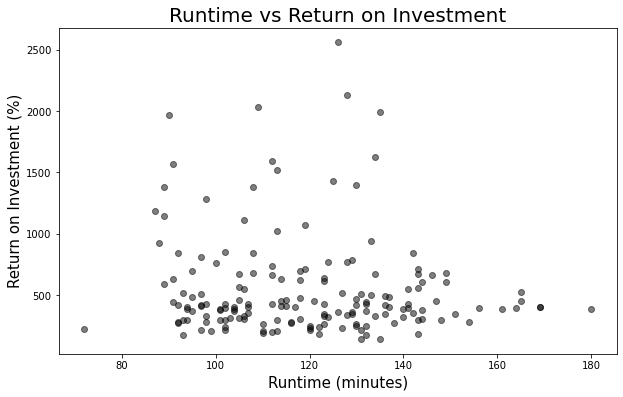

In [42]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(top_movies_df['runtime_minutes'], top_movies_df['RoI'], c='black', alpha=0.5)
ax.set_xlabel('Runtime (minutes)', fontsize=15)
ax.set_ylabel('Return on Investment (%)', fontsize=15)
ax.set_title('Runtime vs Return on Investment', fontsize=20);

In [43]:
# Evalulate the Pearson correlation coefficient between the 'runtime_minutes' and 'RoI' columns
np.corrcoef(top_movies_df['runtime_minutes'], top_movies_df['RoI'])[0,1]

-0.09673399075691598

We can observe from the scatter figure above that there is no clear correlation between runtime and ROI. In addition, the correlation coefficient is closer to zero when we examine the Pearson correlation coefficient. This implies that a movie's length has no bearing on its return on investment.

2.Production Budget

We are going to plot a scatter plot to visualize the relationship between the 'production_budget' and 'RoI'.

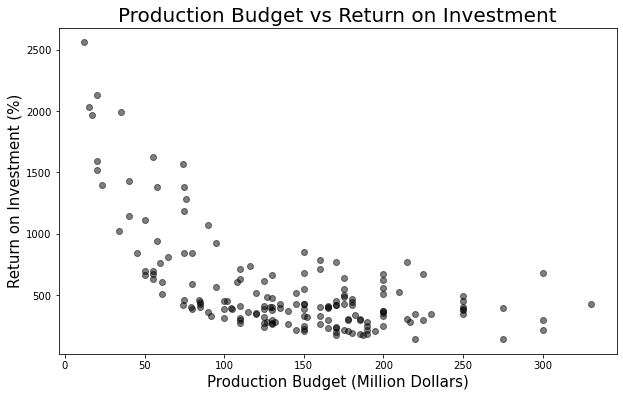

In [44]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(top_movies_df['production_budget']*(10**(-6)), top_movies_df['RoI'], c='black', alpha=0.5)
ax.set_xlabel('Production Budget (Million Dollars)', fontsize=15)
ax.set_ylabel('Return on Investment (%)', fontsize=15)
ax.set_title('Production Budget vs Return on Investment', fontsize=20);

In [45]:
# Evaluate the Pearson correlation coefficient between the 'production_budget' and 'RoI' columns
np.corrcoef(top_movies_df['production_budget'], top_movies_df['RoI'])[0,1]

-0.6014369562247762

We can observe from the scatter plot above that there is a bad association between the RoI and the production budget. This connection is not linear, though. The correlation is highly negative between 0 and 100 million dollars. The return on investment and the budget have no discernible relationship between 100 and 300 million dollars, though. According to the Pearson correlation coefficient, there is a substantially negative link between the production budget and the return on investment (-0.6).

3. Release Date

We shall be looking to see if there is a relationship between the release date and the RoI.

Month

In order to see the link between the month of release and the average RoI, we will first concentrate on the month in which the movies were released.

In [46]:
# Create a new column that contains the month that the movies were released
release_time_df = top_movies_df.copy()
release_time_df['release_month'] = release_time_df["release_date"].dt.strftime('%B').astype(str)

release_time_df.head() # Preview the updated 'release_time_df' DataFrame

,movie_id,release_date,movie,production_budget,worldwide_gross,RoI,runtime_minutes,genres,averagerating,release_month
0,tt2582846,2014-06-06,The Fault in Our Stars,12000000,307166834,2559.723617,126.0,"Drama,Romance",7.7,June
1,tt3783958,2016-12-09,La La Land,20000000,426351163,2131.755815,128.0,"Comedy,Drama,Music",8.0,December
2,tt5140878,2017-08-11,Annabelle: Creation,15000000,305384865,2035.899100,109.0,"Horror,Mystery,Thriller",6.5,August
3,tt1396484,2017-09-08,It,35000000,697457969,1992.737054,135.0,"Horror,Thriller",7.4,September
4,tt6644200,2018-04-06,A Quiet Place,17000000,334522294,1967.778200,90.0,"Drama,Horror,Sci-Fi",7.6,April


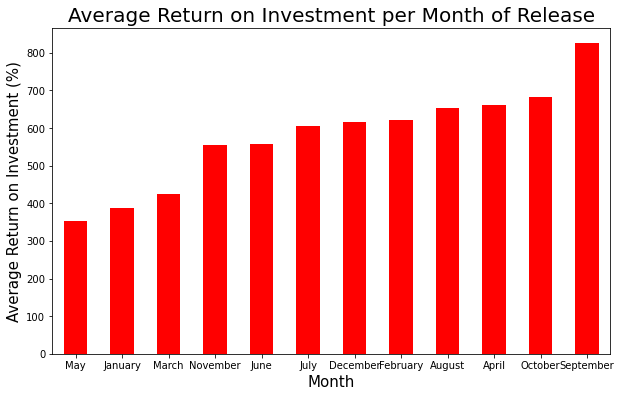

In [47]:
# Create a plot that shows average return on investment (RoI) by month
fig, ax = plt.subplots(figsize=(10,6))
release_time_df.groupby('release_month')['RoI'].mean().sort_values().plot(kind='bar', color='red')
ax.set_xlabel('Month', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Average Return on Investment (%)', fontsize=15)
ax.set_title('Average Return on Investment per Month of Release', fontsize=20);

Compared to movies made in other months, those that are released in September and October (the fall season) appear to have a better average return on investment. Nevertheless, we also need to consider how many movies are released each month.

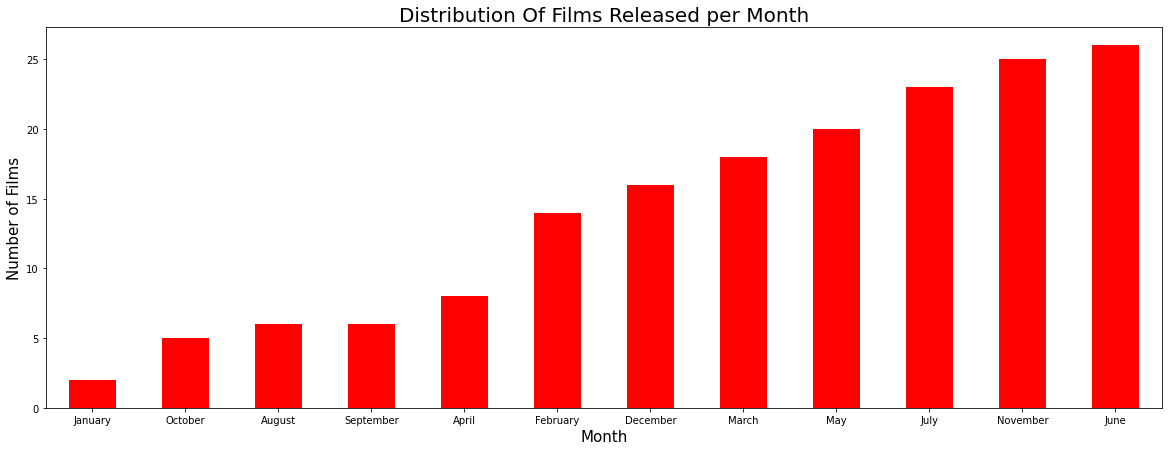

In [48]:
# Create a plot that shows the number of films released each month
fig, ax = plt.subplots(figsize=(20,7))
release_time_df.groupby('release_month')['movie'].count().sort_values().plot(kind='bar', color='red')
ax.set_xlabel('Month', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Number of Films', fontsize=15)
ax.set_title('Distribution Of Films Released per Month', fontsize=20);

From the 'Number of Films Released per Month' plot above, We can observe that there are not always an equal amount of movies released each month. This may explain why months with fewer films categorized under them, like September and October, have better average returns on investment than the other months.

Season

We are now going to look at the seasons that the films were released and plot a bar plot to visualize the average RoI per season.

In [49]:
# Create a dictionary that maps months to their season
seasons = {'January':'Winter',
           'February':'Winter',
           'March':'Spring',
           'April':'Spring',
           'May':'Spring',
           'June':'Summer',
           'July':'Summer',
           'August':'Summer',
           'September':'Fall',
           'October':'Fall',
           'November':'Fall',
           'December':'Winter'}

# Create a new column that contains the season that the movie was released in
release_time_df['release_season'] = release_time_df['release_month'].map(seasons)

release_time_df.head() # Preview the updated 'release_time_df' DataFrame


,movie_id,release_date,movie,production_budget,worldwide_gross,RoI,runtime_minutes,genres,averagerating,release_month,release_season
0,tt2582846,2014-06-06,The Fault in Our Stars,12000000,307166834,2559.723617,126.0,"Drama,Romance",7.7,June,Summer
1,tt3783958,2016-12-09,La La Land,20000000,426351163,2131.755815,128.0,"Comedy,Drama,Music",8.0,December,Winter
2,tt5140878,2017-08-11,Annabelle: Creation,15000000,305384865,2035.899100,109.0,"Horror,Mystery,Thriller",6.5,August,Summer
3,tt1396484,2017-09-08,It,35000000,697457969,1992.737054,135.0,"Horror,Thriller",7.4,September,Fall
4,tt6644200,2018-04-06,A Quiet Place,17000000,334522294,1967.778200,90.0,"Drama,Horror,Sci-Fi",7.6,April,Spring


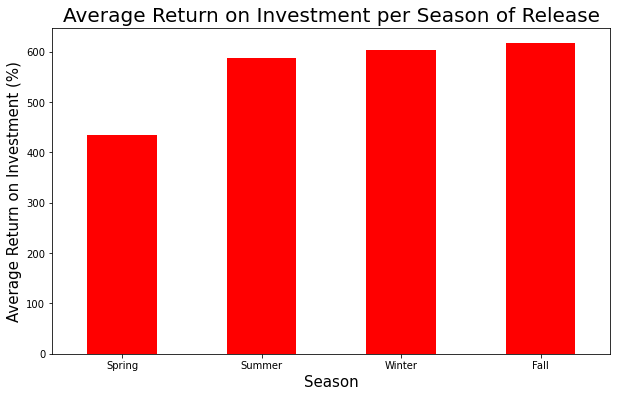

In [50]:
# Create a plot that shows average return on investment (RoI) by season
fig, ax = plt.subplots(figsize=(10,6))

release_time_df.groupby('release_season')['RoI'].mean().sort_values().plot(kind='bar', color='red')
ax.set_xlabel('Season', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Average Return on Investment (%)', fontsize=15)
ax.set_title('Average Return on Investment per Season of Release', fontsize=20);


The bar graph above demonstrates that fall movie releases have the highest average return on investment. Winter, Summer, and Spring all follow it closely. Before drawing any conclusions, though, it is important to consider how many movies are released each season.

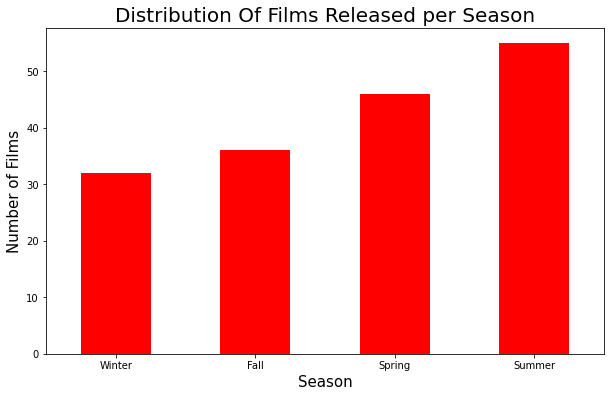

In [51]:
# Create a plot that shows the number of films released each season
fig, ax = plt.subplots(figsize=(10,6))

release_time_df.groupby('release_season')['movie'].count().sort_values().plot(kind='bar', color='red')
ax.set_xlabel('Season', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Number of Films', fontsize=15)
ax.set_title('Distribution Of Films Released per Season', fontsize=20);

We can see from the "Number of Films Released Per Season" figure above that the number of films released each season is distributed quite evenly. Even though there are more movies made in the summer, the average return on investment is not the lowest; rather, it is equivalent to the average return on investment for the best season (fall). This shows that the summer may be the ideal time to release a movie.

4. Worlwide Gross

We are going to plot a scatter plot to visualize the relationship between the 'worldwide_gross' and 'RoI'.

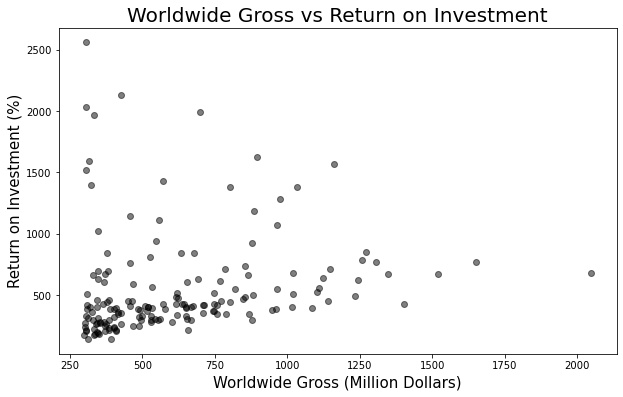

In [52]:
# Create a scatter plot to visualize worldwide gross vs RoI
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(top_movies_df['worldwide_gross']*(10**(-6)), top_movies_df['RoI'], c='black', alpha=0.5)
ax.set_xlabel('Worldwide Gross (Million Dollars)', fontsize=15)
ax.set_ylabel('Return on Investment (%)', fontsize=15)
ax.set_title('Worldwide Gross vs Return on Investment', fontsize=20);


In [53]:
# We can also look at the Pearson correlation coefficient between the 'worldwide_gross' and 'RoI' columns
np.corrcoef(top_movies_df['worldwide_gross'], top_movies_df['RoI'])[0,1]

0.1511294766315755

From the scatter plot above, there is no distinct relationship between the worldwide gross and the RoI. Looking at the Pearson correlation coefficient, we see that the correlation coefficient (0.15) is closer to 0 therefore suggesting that the worldwide gross of a film has no impact on its RoI.

5. Genre

We are going to plot a barchart to visualize the relationship between the 'genre' and average 'RoI' for that genre. However, before we can plot, the genre column needs to normalized.

In [54]:
# Assign the top_movies_df DataFrame to a new variable called 'genre_analysis_df'. It shall be used for genre analysis
genre_analysis_df = top_movies_df.copy()
genre_analysis_df['genres'] = genre_analysis_df.genres.apply(lambda x: x.split(','))

genre_analysis_df = genre_analysis_df.explode('genres') # Normalize the 'genres' column by exploding the list of genres

genre_analysis_df.head() # Preview the first few records of the 'genre_analysis_df' DataFrame

,movie_id,release_date,movie,production_budget,worldwide_gross,RoI,runtime_minutes,genres,averagerating
0,tt2582846,2014-06-06,The Fault in Our Stars,12000000,307166834,2559.723617,126.0,Drama,7.7
0,tt2582846,2014-06-06,The Fault in Our Stars,12000000,307166834,2559.723617,126.0,Romance,7.7
1,tt3783958,2016-12-09,La La Land,20000000,426351163,2131.755815,128.0,Comedy,8.0
1,tt3783958,2016-12-09,La La Land,20000000,426351163,2131.755815,128.0,Drama,8.0
1,tt3783958,2016-12-09,La La Land,20000000,426351163,2131.755815,128.0,Music,8.0


In [55]:
genre_analysis_df.genres.unique() # Identify the unique genres in the 'genre_analysis_df' DataFrame

array(['Drama', 'Romance', 'Comedy', 'Music', 'Horror', 'Mystery',
       'Thriller', 'Sci-Fi', 'Biography', 'Adventure', 'Animation',
       'Family', 'Action', 'Fantasy', 'Musical', 'Crime', 'Western',
       'History', 'War', 'Documentary'], dtype=object)

In [56]:
# Identify the records that belong to the 'Musical' genre an convert them to 'Music' genre
genre_analysis_df.loc[genre_analysis_df['genres'] == 'Musical', 'genres'] = 'Music'

genre_analysis_df.genres.unique() # Check if the unique genres have been updated

array(['Drama', 'Romance', 'Comedy', 'Music', 'Horror', 'Mystery',
       'Thriller', 'Sci-Fi', 'Biography', 'Adventure', 'Animation',
       'Family', 'Action', 'Fantasy', 'Crime', 'Western', 'History',
       'War', 'Documentary'], dtype=object)

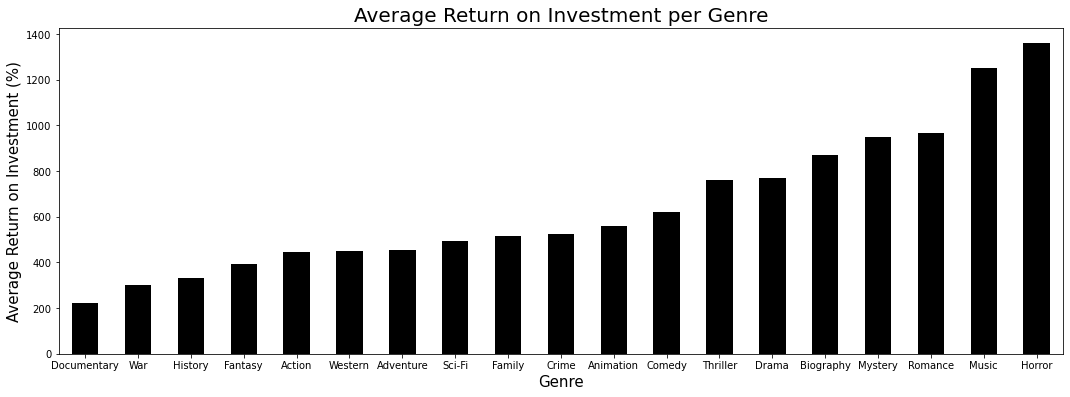

In [57]:
# Create a plot that shows average return on investment (RoI) by genre
fig, ax = plt.subplots(figsize=(18,6))

genre_analysis_df.groupby('genres')['RoI'].mean().sort_values().plot(kind='bar',color='black')
ax.set_xlabel('Genre', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Average Return on Investment (%)', fontsize=15)
ax.set_title('Average Return on Investment per Genre', fontsize=20);

The "Horror" and "Music" genres have better average returns on investment than other genres, as can be shown. However, before drawing any conclusions, it is important to comprehend the quantity of films released in each genre and evaluate the distribution of films by genre.

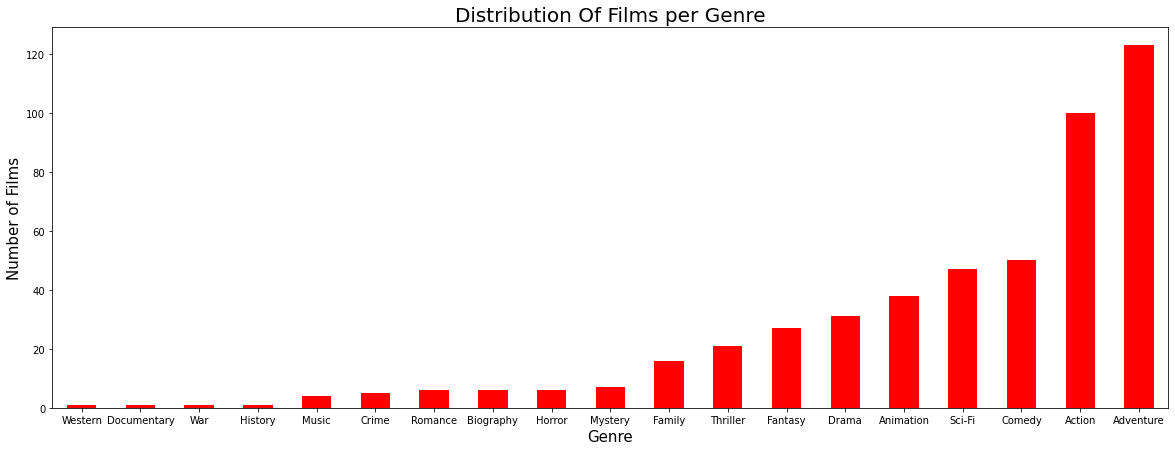

In [58]:
# Create a plot that counts the number of movies by genre
fig, ax = plt.subplots(figsize=(13,7))

genre_analysis_df.groupby('genres')['movie'].count().sort_values().plot(kind='bar', figsize=(20,7), color='red')
ax.set_xlabel('Genre', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Number of Films', fontsize=15)
ax.set_title('Distribution Of Films per Genre', fontsize=20);

We can observe from the plot above that the dataset's distribution of films by genre is not uniform. We must thus consider the fact that the 'Horror' and 'Music' genres have a greater average return on investment since there are fewer movies that fall into those categories. But, it's crucial to remember that the majority of the Top 200 Highest Grossing Films—originally chosen—were Adventure and Action movies. This shows that the most profitable genres for movies on average are adventure and action.

6. Directors

We are going to plot a barchart to visualize the relationship between directors and average RoI for the films. We first need to create a new DataFrame that contains the movies and their director information.

In [59]:
# Create a copy of the 'top_movies_df' DataFrame to a new variable called 'director_analysis_df'
director_analysis_df = top_movies_df.copy()

# Join the directors_df DataFrame to the top_movies_df DataFrame and assign it to a new DataFrame called 'director_analysis_df'
director_analysis_df = director_analysis_df.join(directors_df.set_index('movie_id'), on='movie_id', how='left')

# Join the persons_df DataFrame to the director_analysis_df DataFrame so that we can identify their names and know whether they are still alive or not
director_analysis_df = director_analysis_df.join(persons_df.set_index('person_id'), on='person_id', how='inner')
director_analysis_df # Preview the updated 'director_analysis_df' DataFrame


,movie_id,release_date,movie,production_budget,worldwide_gross,RoI,runtime_minutes,genres,averagerating,person_id,primary_name,birth_year,death_year,primary_profession
0,tt2582846,2014-06-06,The Fault in Our Stars,12000000,307166834,2559.723617,126.0,"Drama,Romance",7.7,nm1837748,Josh Boone,1979.0,NaN,"writer,director,producer"
1,tt3783958,2016-12-09,La La Land,20000000,426351163,2131.755815,128.0,"Comedy,Drama,Music",8.0,nm3227090,Damien Chazelle,1985.0,NaN,"producer,writer,director"
2,tt5140878,2017-08-11,Annabelle: Creation,15000000,305384865,2035.899100,109.0,"Horror,Mystery,Thriller",6.5,nm2497546,David F. Sandberg,NaN,NaN,"director,composer,writer"
74,tt0448115,2019-04-05,Shazam!,85000000,362899733,426.940862,132.0,"Action,Adventure,Comedy",7.4,nm2497546,David F. Sandberg,NaN,NaN,"director,composer,writer"
3,tt1396484,2017-09-08,It,35000000,697457969,1992.737054,135.0,"Horror,Thriller",7.4,nm0615592,Andy Muschietti,NaN,NaN,"director,writer,producer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,tt2660888,2016-07-22,Star Trek Beyond,185000000,335802233,181.514721,122.0,"Action,Adventure,Sci-Fi",7.1,nm0510912,Justin Lin,1973.0,NaN,"producer,director,writer"
165,tt1979388,2015-11-25,The Good Dinosaur,187500000,333771037,178.011220,93.0,"Adventure,Animation,Comedy",6.7,nm0812307,Peter Sohn,1977.0,NaN,"actor,animation_department,art_department"
166,tt3741700,2019-05-31,Godzilla: King of the Monsters,170000000,299276941,176.045259,132.0,"Action,Adventure,Fantasy",6.7,nm1002424,Michael Dougherty,1974.0,NaN,"writer,director,actor"
167,tt3778644,2018-05-25,Solo: A Star Wars Story,275000000,393151347,142.964126,135.0,"Action,Adventure,Fantasy",7.0,nm0000165,Ron Howard,1954.0,NaN,"actor,producer,director"


In [60]:
# Check if any records have directors that have passed on. If so, drop the records from the 'director_analysis_df' DataFrame
director_analysis_df[director_analysis_df['death_year'].notna()]

,movie_id,release_date,movie,production_budget,worldwide_gross,RoI,runtime_minutes,genres,averagerating,person_id,primary_name,birth_year,death_year,primary_profession


In [61]:
# Directors with more than one film will give the 'person_id' column duplicates. Therefore, we need to identify the duplicate person_id values
director_ids = director_analysis_df[director_analysis_df.duplicated(subset='person_id')]['person_id'].unique()

# Update the 'director_analysis_df' DataFrame to only include directors with multiple films
director_analysis_df = director_analysis_df[director_analysis_df['person_id'].isin(director_ids)]
director_analysis_df # Preview the updated 'director_analysis_df' DataFrame

,movie_id,release_date,movie,production_budget,worldwide_gross,RoI,runtime_minutes,genres,averagerating,person_id,primary_name,birth_year,death_year,primary_profession
2,tt5140878,2017-08-11,Annabelle: Creation,15000000,305384865,2035.899100,109.0,"Horror,Mystery,Thriller",6.5,nm2497546,David F. Sandberg,NaN,NaN,"director,composer,writer"
74,tt0448115,2019-04-05,Shazam!,85000000,362899733,426.940862,132.0,"Action,Adventure,Comedy",7.4,nm2497546,David F. Sandberg,NaN,NaN,"director,composer,writer"
5,tt1727824,2018-11-02,Bohemian Rhapsody,55000000,894985342,1627.246076,134.0,"Biography,Drama,Music",8.0,nm0001741,Bryan Singer,1965.0,NaN,"producer,director,writer"
106,tt1877832,2014-05-23,X-Men: Days of Future Past,200000000,747862775,373.931388,132.0,"Action,Adventure,Sci-Fi",8.0,nm0001741,Bryan Singer,1965.0,NaN,"producer,director,writer"
126,tt3385516,2016-05-27,X-Men: Apocalypse,178000000,542537546,304.796374,144.0,"Action,Adventure,Sci-Fi",7.0,nm0001741,Bryan Singer,1965.0,NaN,"producer,director,writer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,tt1872181,2014-05-02,The Amazing Spider-Man 2,200000000,708996336,354.498168,142.0,"Action,Adventure,Sci-Fi",6.6,nm1989536,Marc Webb,1974.0,NaN,"producer,director,writer"
115,tt0948470,2012-07-03,The Amazing Spider-Man,220000000,757890267,344.495576,136.0,"Action,Adventure,Sci-Fi",7.0,nm1989536,Marc Webb,1974.0,NaN,"producer,director,writer"
113,tt2975590,2016-03-25,Batman v Superman: Dawn of Justice,250000000,867500281,347.000112,151.0,"Action,Adventure,Fantasy",6.5,nm0811583,Zack Snyder,1966.0,NaN,"producer,director,writer"
134,tt0770828,2013-06-14,Man of Steel,225000000,667999518,296.888675,143.0,"Action,Adventure,Sci-Fi",7.1,nm0811583,Zack Snyder,1966.0,NaN,"producer,director,writer"


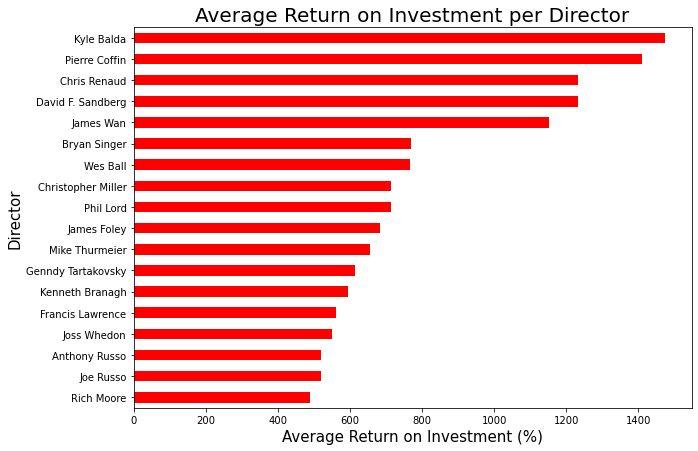

In [62]:
# Plot a bar chart that shows the average film (RoI) per director for the top 20 directors
fig, ax = plt.subplots(figsize=(10,7))

director_analysis_df.groupby('primary_name')['RoI'].mean().sort_values(ascending=True)[20:].plot(kind='barh', color='red')
ax.set_ylabel('Director', fontsize=15)
ax.set_xlabel('Average Return on Investment (%)', fontsize=15)
ax.set_title('Average Return on Investment per Director', fontsize=20);

The top 5 directors with a highest average return on investment are: Kyle Balda, Pierre Coffin, Chris Rennaud, David F. Sandberg, and James Wan.

7. Writers

We are going to plot a barchart to visualize the relationship between writers and average RoI for the films. We first need to create a new DataFrame that contains the movies and their actor information.

In [63]:
# Create a copy of the 'top_movies_df' DataFrame to a new variable called 'writer_analysis_df'
writer_analysis_df = top_movies_df.copy()

# Join the top_movies_df DataFrame to the writer_analysis_df DataFrame
writer_analysis_df = writer_analysis_df.join(writers_df.set_index('movie_id'), on='movie_id', how='left')

# Join the persons_df DataFrame to the writer_analysis_df DataFrame so that we can identify their names
writer_analysis_df = writer_analysis_df.join(persons_df.set_index('person_id'), on='person_id', how='inner')
writer_analysis_df # Preview the updated 'writer_analysis_df' DataFrame

,movie_id,release_date,movie,production_budget,worldwide_gross,RoI,runtime_minutes,genres,averagerating,person_id,primary_name,birth_year,death_year,primary_profession
0,tt2582846,2014-06-06,The Fault in Our Stars,12000000,307166834,2559.723617,126.0,"Drama,Romance",7.7,nm2354099,Scott Neustadter,1977.0,NaN,"writer,producer"
0,tt2582846,2014-06-06,The Fault in Our Stars,12000000,307166834,2559.723617,126.0,"Drama,Romance",7.7,nm2352210,Michael H. Weber,NaN,NaN,"writer,producer,miscellaneous"
0,tt2582846,2014-06-06,The Fault in Our Stars,12000000,307166834,2559.723617,126.0,"Drama,Romance",7.7,nm1981261,John Green,1977.0,NaN,"producer,writer,director"
1,tt3783958,2016-12-09,La La Land,20000000,426351163,2131.755815,128.0,"Comedy,Drama,Music",8.0,nm3227090,Damien Chazelle,1985.0,NaN,"producer,writer,director"
2,tt5140878,2017-08-11,Annabelle: Creation,15000000,305384865,2035.899100,109.0,"Horror,Mystery,Thriller",6.5,nm2477891,Gary Dauberman,NaN,NaN,"writer,producer,director"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,tt1979388,2015-11-25,The Good Dinosaur,187500000,333771037,178.011220,93.0,"Adventure,Animation,Comedy",6.7,nm0373282,Peter Hedges,1962.0,NaN,"writer,director,actor"
166,tt3741700,2019-05-31,Godzilla: King of the Monsters,170000000,299276941,176.045259,132.0,"Action,Adventure,Fantasy",6.7,nm1296461,Zach Shields,NaN,NaN,"producer,writer,soundtrack"
167,tt3778644,2018-05-25,Solo: A Star Wars Story,275000000,393151347,142.964126,135.0,"Action,Adventure,Fantasy",7.0,nm0440459,Jonathan Kasdan,1979.0,NaN,"actor,writer,director"
167,tt3778644,2018-05-25,Solo: A Star Wars Story,275000000,393151347,142.964126,135.0,"Action,Adventure,Fantasy",7.0,nm0001410,Lawrence Kasdan,1949.0,NaN,"writer,producer,director"


In [64]:
# Writers with more than one film will give the 'person_id' column duplicates. Therefore, we need to identify the duplicate person_id values
writer_ids = writer_analysis_df[writer_analysis_df.duplicated(subset='person_id')]['person_id'].unique()

# Update the 'writer_analysis_df' DataFrame to only include writers with multiple films
writer_analysis_df = writer_analysis_df[writer_analysis_df['person_id'].isin(writer_ids)]
writer_analysis_df # Preview the updated 'director_analysis_df' DataFrame

,movie_id,release_date,movie,production_budget,worldwide_gross,RoI,runtime_minutes,genres,averagerating,person_id,primary_name,birth_year,death_year,primary_profession
2,tt5140878,2017-08-11,Annabelle: Creation,15000000,305384865,2035.899100,109.0,"Horror,Mystery,Thriller",6.5,nm2477891,Gary Dauberman,NaN,NaN,"writer,producer,director"
3,tt1396484,2017-09-08,It,35000000,697457969,1992.737054,135.0,"Horror,Thriller",7.4,nm2477891,Gary Dauberman,NaN,NaN,"writer,producer,director"
7,tt2293640,2015-07-10,Minions,74000000,1160336173,1568.021855,91.0,"Adventure,Animation,Comedy",6.4,nm0528244,Brian Lynch,1973.0,NaN,"writer,actor,director"
7,tt2293640,2015-07-10,Minions,74000000,1160336173,1568.021855,91.0,"Adventure,Animation,Comedy",6.4,nm0528244,Brian Lynch,1973.0,NaN,"writer,actor,director"
14,tt2709768,2016-07-08,The Secret Life of Pets,75000000,886750534,1182.334045,87.0,"Adventure,Animation,Comedy",6.5,nm0528244,Brian Lynch,1973.0,NaN,"writer,actor,director"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,tt2660888,2016-07-22,Star Trek Beyond,185000000,335802233,181.514721,122.0,"Action,Adventure,Sci-Fi",7.1,nm0734472,Gene Roddenberry,1921.0,1991.0,"writer,producer,miscellaneous"
148,tt1623205,2013-03-08,Oz the Great and Powerful,200000000,490359051,245.179525,130.0,"Adventure,Family,Fantasy",6.3,nm1865755,David Lindsay-Abaire,1969.0,NaN,"writer,soundtrack,music_department"
157,tt1446192,2012-11-21,Rise of the Guardians,145000000,306900902,211.655794,97.0,"Action,Adventure,Animation",7.3,nm1865755,David Lindsay-Abaire,1969.0,NaN,"writer,soundtrack,music_department"
158,tt2345759,2017-06-09,The Mummy,195000000,409953905,210.232772,110.0,"Action,Adventure,Fantasy",5.5,nm0003160,Christopher McQuarrie,1968.0,NaN,"writer,producer,director"


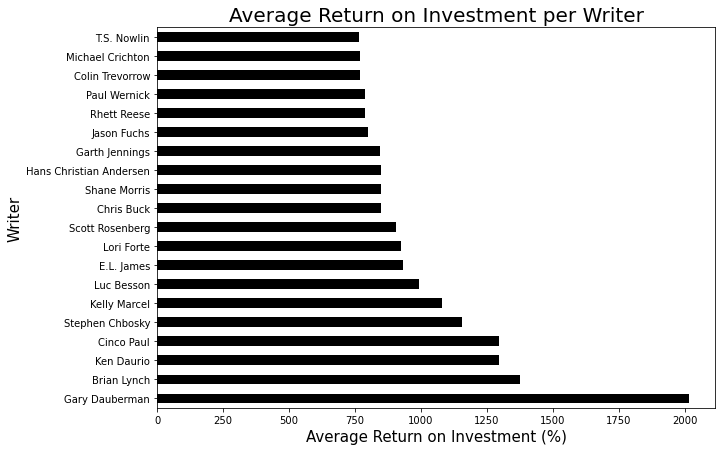

In [65]:
# Plot a bar chart that shows the average film (RoI) per writer for the top 20 writers
fig, ax = plt.subplots(figsize=(10,7))

writer_analysis_df.groupby('primary_name')['RoI'].mean().sort_values(ascending=False)[:20].plot(kind='barh', color='black')
ax.set_ylabel('Writer', fontsize=15)
ax.set_xlabel('Average Return on Investment (%)', fontsize=15)
ax.set_title('Average Return on Investment per Writer', fontsize=20);


With an average RoI that is about 50% higher than the second-best writer, Brian Lynch, Gary Dauberman has the greatest average RoI among the writers.

8. Rating

The film's rating is the position it received from the public on a scale from 0 to 10. To see how the "rating" and the "RoI" relate to one another, we will create a scatter plot. We want to know what people think of these top-performing movies and whether or not that indicates that the movie is excellent.

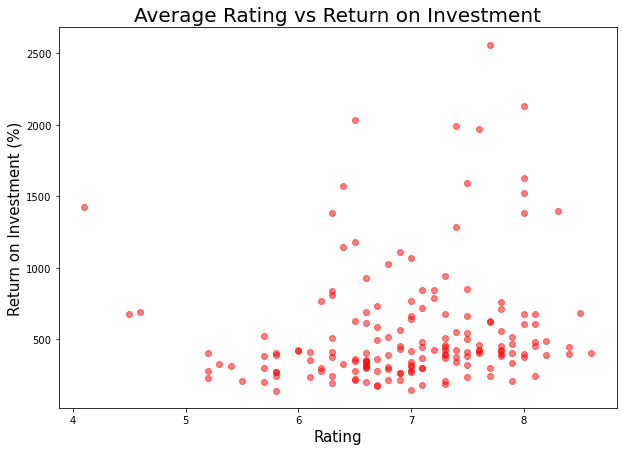

In [66]:
# Plot a scatter plot that shows the relationship between RoI and rating 
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(top_movies_df['averagerating'], top_movies_df['RoI'], alpha=0.5, color='red')
ax.set_xlabel('Rating', fontsize=15)
ax.set_ylabel('Return on Investment (%)', fontsize=15)
ax.set_title('Average Rating vs Return on Investment', fontsize=20);

In [67]:
# Evaluate the Pearson correlation coefficient between the 'averagerating' and 'RoI' columns
np.corrcoef(top_movies_df['averagerating'], top_movies_df['RoI'])[0,1]

0.15197381428774626

It is challenging to discern any clear link between the rating and the RoI from the scatter plot. There is, in fact, no association between a film's rating and its return on investment (RoI), as shown by the Pearson correlation coefficient's value of 0.15, which is closer to 0.

## Conclusion and Recommendations

1. The Runtime of a film has no impact on its box office performance.
2. The Production Budget of a film has a modereately negative correlation with its return on investment.
3. The Worldwide Gross of a film has no impact on its return on investment.
4. Movies released in the Summer are more likely to yield a higher return on investment. Whilst September (Fall) had the best average return on investment, the quantity of films released was much smaller than other months. As a result, it would not have been a reliable indicator of the best time to release a movie.
5. 'Horror' and 'Music' genres are more likely to have a higher return on investment.. It is however important to note that 'Action' and 'Adventure' films are the top most grossing.
6. Films directed by Kyle Balda, Pierre Coffin, Chris Rennaud, David F. Sandberg, and James Wan produce the highest return on investment.
7. Films written by Gary Dauberman produce the highest return on investment.
8. Success of a film is not determinant on the films rating